<a href="https://colab.research.google.com/github/Azmaara/-Far_Azmaara/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective:

The purpose of the analysis is to identify the factors that contribute to customer churn, or the rate at which customers depart the bank, and to develop insights that will aid the bank in reducing churn and retaining customers. The bank may be able to identify critical areas for enhancement based on the analysis, such as customer service, product offerings, and communication strategies.

**DATASET**


*   **RowNumber**: Row number.
*   **CustomerId:**Unique ID for each customer.
*   **Surname**: Surname of the customer.
*   **CreditScore**: The credit score of the customer, based on their  credit history.
*   **Geography**: The country or region where the customer resides.
*   **Gender**: Customer Gender.
*   **Age**: Customer Age.
*   **Tenure:** The number of years that the customer has been with the bank.
*   **Balance**: The current balance in the customer's account.
*   **NumOfProducts:** The number of bank products that the customer uses.
*   **HasCrCard:** Whether or not the customer has a credit card with the bank.
*  **IsActiveMember:** Whether or not the customer is an active member of the bank.
* **EstimatedSalary:** The estimated salary of the customer.
* **Exited:** Whether or not the customer has left the bank (1 if yes, 0 if no).


















##Importing the necessary packages

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

#### **Reading** the datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_id = '1--XlxcNyd5o27rouABfWse_YBw3wUc-0'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)


**Displaying the first few rows of the dataset**

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Understanding the shape of the user dataset

In [6]:
df.shape

(10000, 14)


*   The bank churn dataset contains 10,000 records with 14 columns. 




Checking the datatype of the columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB



*   Majority of the columns are of type integer and some are type object and two columns are of type float.
*   There are no missing values in the dataset



##Summary of the data


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


Observations

* Mean value for the age column is approx 38.92 and the median value is 37 . This shows that majority of the customers are between 32 and 44 years of age.
 The Mean credit score of customers is approx 650.53 and max is 850. We will explore this further in univariate analysis.
* Mean duration of the customers tenure with the bank is 5 years and max is 10 years.

In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##Observations on exited

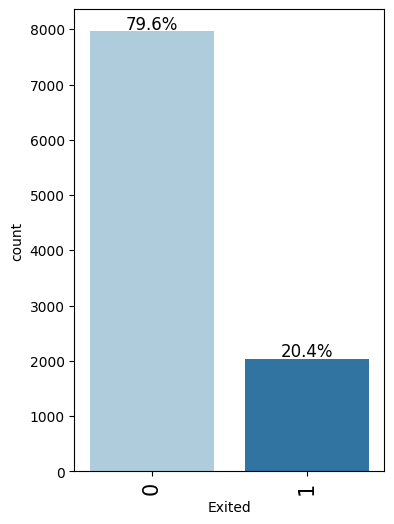

In [10]:
labeled_barplot(df, "Exited", perc=True)

* 20.4 % of the employees left the bank and 79.6% did not.

Observation on Gender

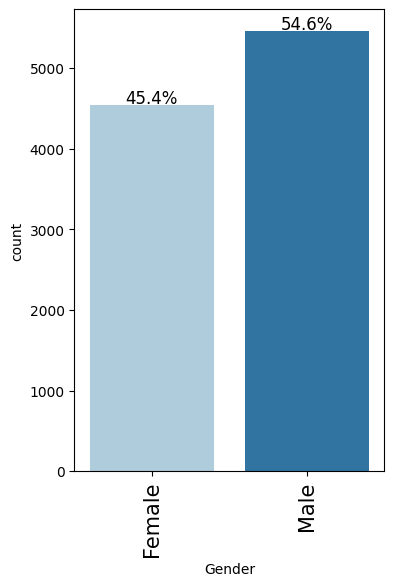

In [11]:
labeled_barplot(df, "Gender", perc=True)

* 54.6% are male customers and 45.4% are female customers

#Bivariate Analysis

In [12]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


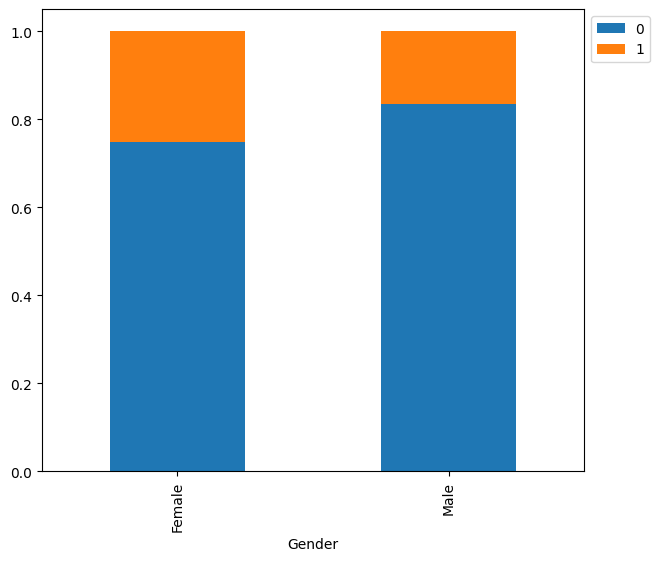

In [13]:
stacked_barplot(df, "Gender", "Exited")

* From the above stacked bar plot chart its obvious that out of the 4543 females 1139 females have exited or left the bank as customers.
* The male bank customers who left the bank are 898 out of 5457

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


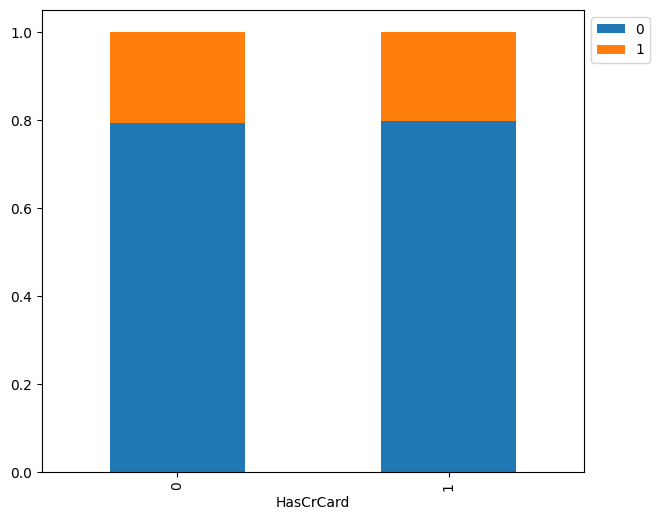

In [ ]:
stacked_barplot(df, "HasCrCard", "Exited")

* 1424 Customers who left the bank also had credit cards issued from the bank and 5631 have not exited or left the bank.

* 7055 customers have credit cards issued from the bank and 2,945 customers dont have credit cards issued. 

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


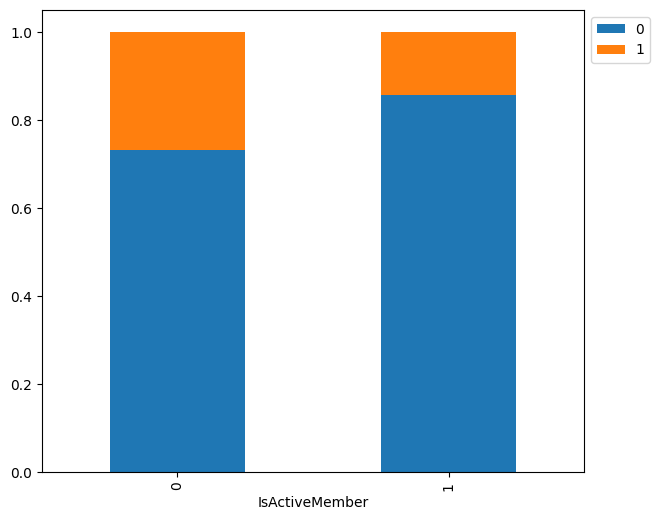

In [ ]:
stacked_barplot(df, "IsActiveMember", "Exited")

*  From the active bank customers members 4,416  did not leave and 735 active members have exited
*  From the bank customers members 3,547 did not leave and 1,302 have exited


In [14]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

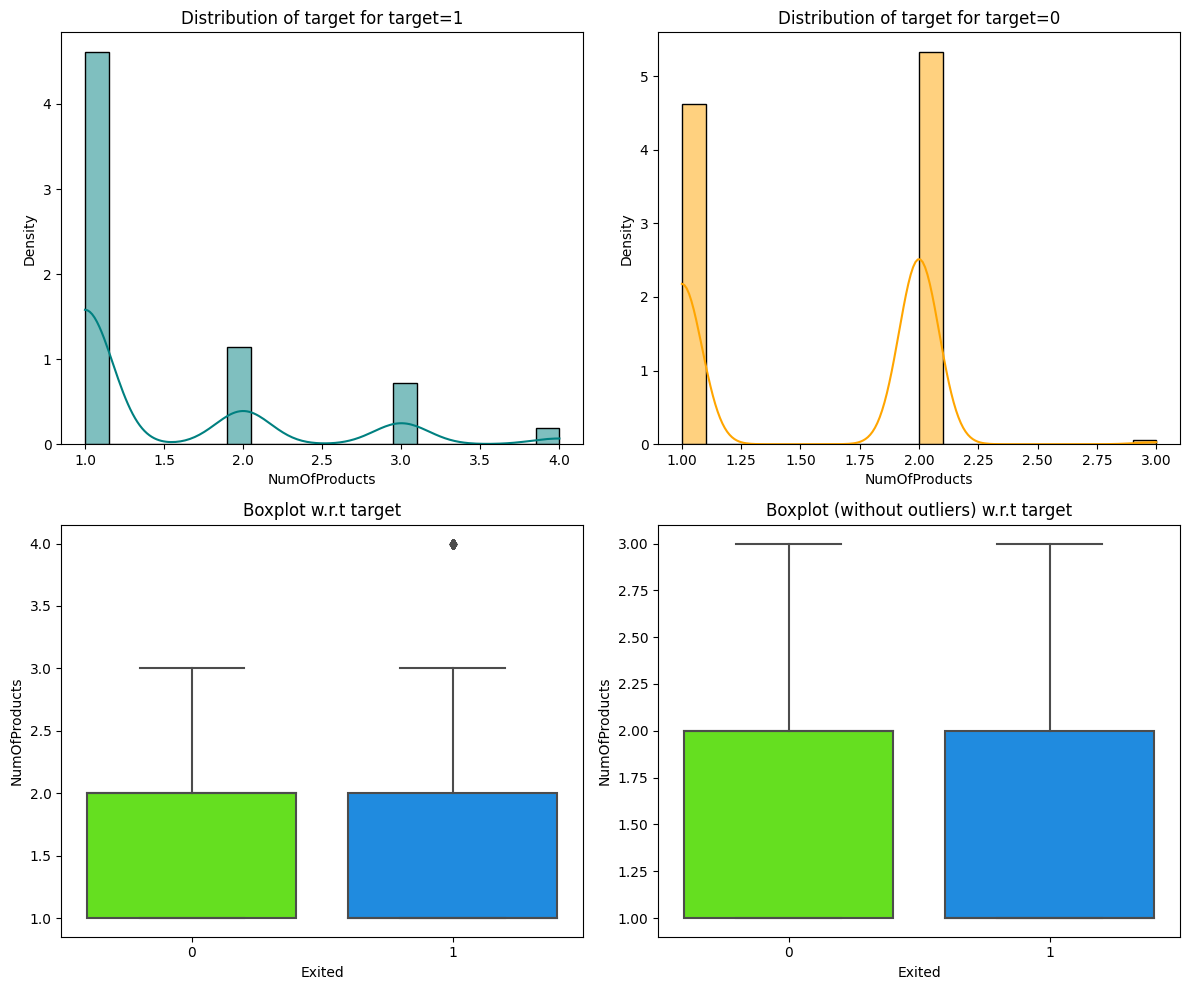

In [ ]:
distribution_plot_wrt_target(df, "NumOfProducts", "Exited")

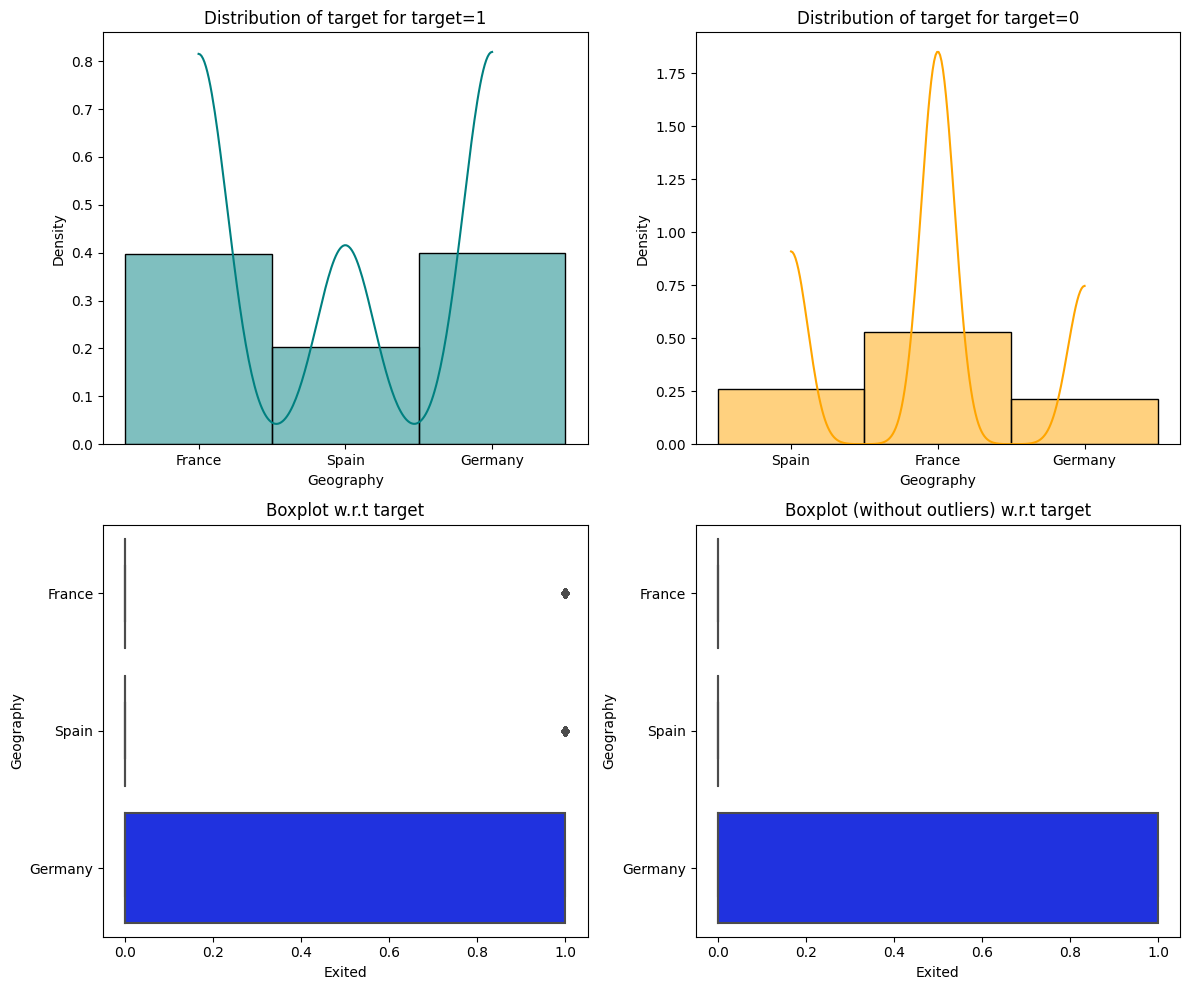

In [ ]:
distribution_plot_wrt_target(df, "Geography", "Exited")